# Uber Exploratory Data Analysis With Python

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [6]:
df=pd.read_csv('Uber Drive.csv')

In [72]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [73]:
col_name = ['Start_info', 'End_info', 'Category', 'Pickup', 'Drop', 'Distance', 'Purpose']

In [74]:
df.columns = col_name

In [75]:
df.head()

,Start_info,End_info,Category,Pickup,Drop,Distance,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


If a data is not available, Python uses NaN to represnet it.

In [76]:
df.isnull().any()

Start_info    False
End_info       True
Category       True
Pickup         True
Drop           True
Distance      False
Purpose        True
dtype: bool

In [77]:
df.isnull().sum()

Start_info      0
End_info        1
Category        1
Pickup          1
Drop            1
Distance        0
Purpose       503
dtype: int64

In [78]:
df=df.dropna()

In [79]:
df.isnull().sum()

Start_info    0
End_info      0
Category      0
Pickup        0
Drop          0
Distance      0
Purpose       0
dtype: int64

Now we can see that there are not missing values in the dataset.

In [80]:
df['Start_info'] = pd.to_datetime(df['Start_info'], format="%m/%d/%Y %H:%M")
df['End_info*'] = pd.to_datetime(df['End_info'], format="%m/%d/%Y %H:%M")

In [81]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['Start_info']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

In [82]:
df.head()

,Start_info,End_info,Category,Pickup,Drop,Distance,Purpose,End_info*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:17:00,21,1,4,1,Friday
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:38:00,20,2,5,1,Saturday
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:45:00,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 15:49:00,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:19:00,17,6,2,1,Wednesday


# Categories In dataset

In [83]:
df['Category'].value_counts()

Business    647
Personal      6
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

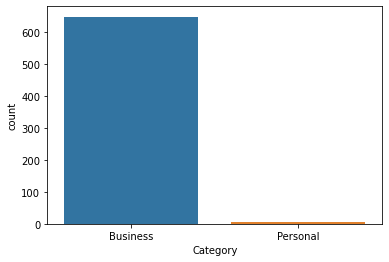

In [84]:
sns.countplot(x='Category', data=df)

As shown in graph large number of business rides in  category as against very few personal rides.

# Distance traveled

<AxesSubplot:ylabel='Frequency'>

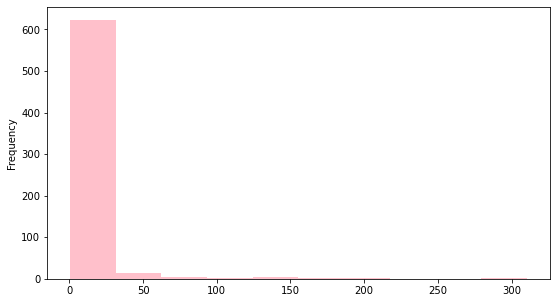

In [99]:
df['Distance'].plot(kind='hist',color='Pink',figsize=(9,5))

As ps graph mostly people travel in a short mile.

#  Time Consumed to reach Destination

Text(0.5, 1.0, 'Number of trips Vs hours')

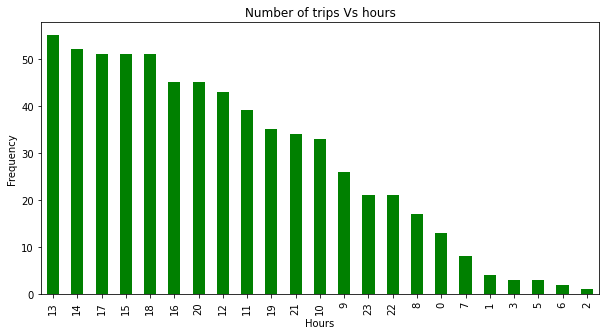

In [86]:
hours = df['Start_info'].dt.hour.value_counts()
hours.plot(kind='bar',color='Green',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

# Purpose of trip

<AxesSubplot:>

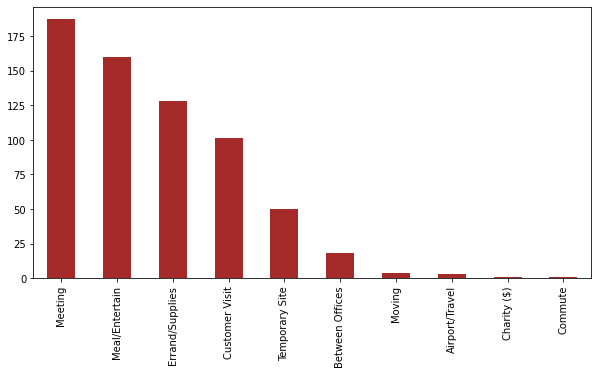

In [87]:
df['Purpose'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can see graph that mostly the purpose of the trip is meeting and meal/entertain.

# Days with the Highest Number Of Trips

<AxesSubplot:>

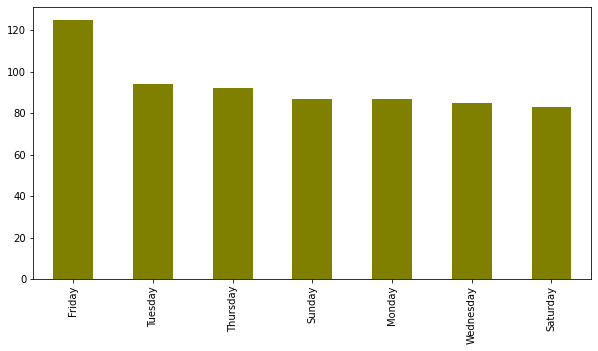

In [100]:
df['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='Olive')

So Friday has the highest number of Trips.

# Number Of Trips Per Day?

Text(0, 0.5, 'Number of trips')

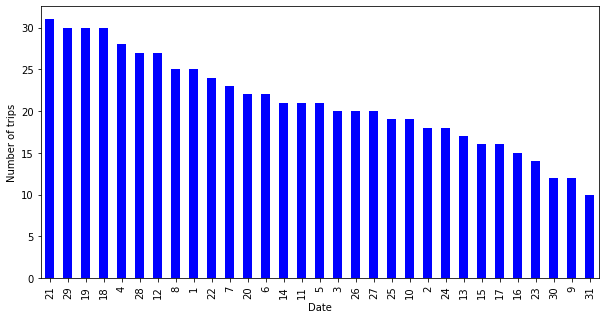

In [105]:
df['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='Blue')
plt.xlabel('Date')
plt.ylabel('Number of trips')

As shown in the graph on 21st higgest number of trip is taken

# Trips In A Month.

<AxesSubplot:>

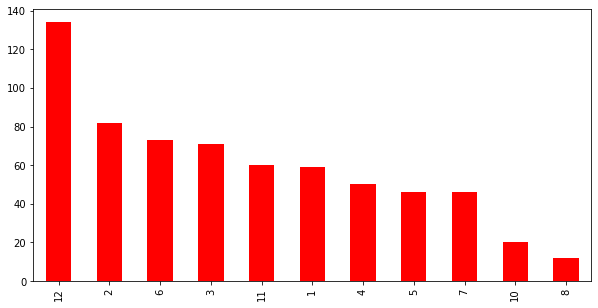

In [90]:
df['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='Red')

As per the graph December(12) has the most trips.

# Highest Pickup Point

<AxesSubplot:>

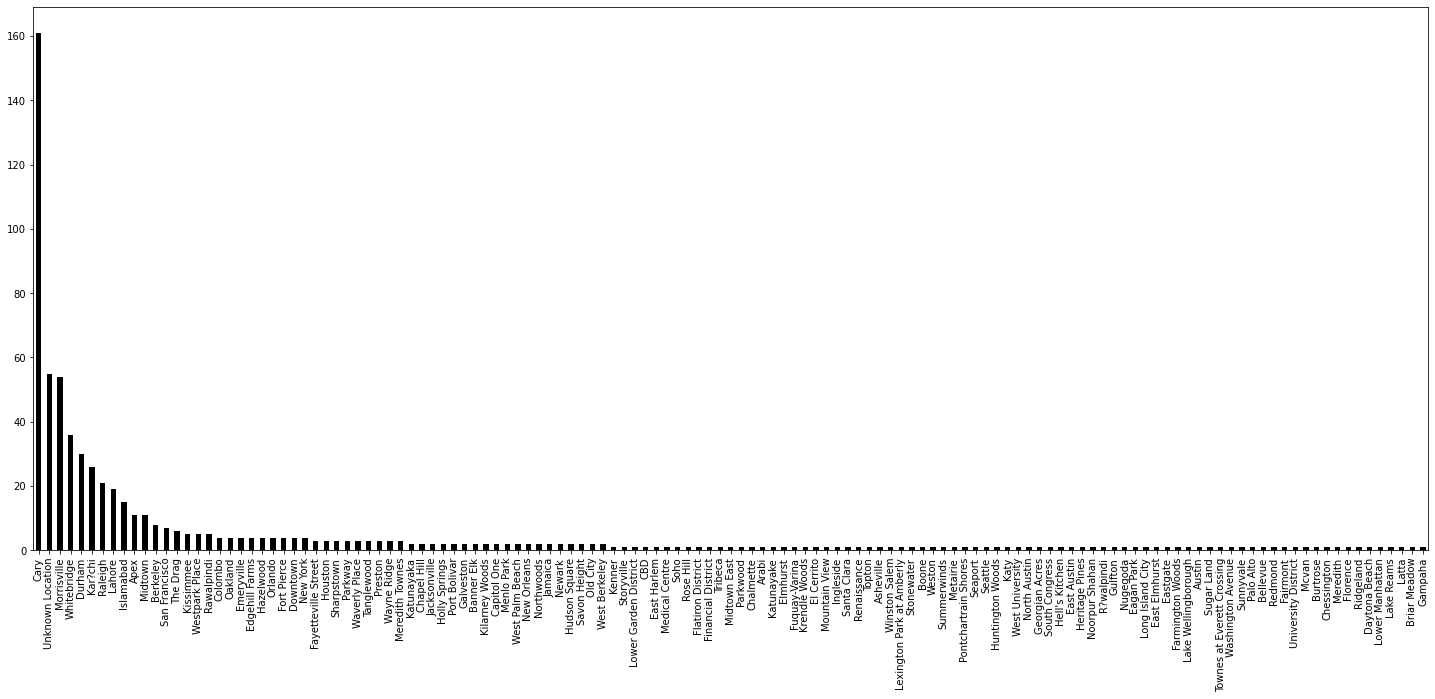

In [106]:
df['Pickup'].value_counts().plot(kind='bar',figsize=(25,10),color='Black')

According to the dataset people starts their journey from Cary followed by some unknown location and then Morrisville.